<a href="https://colab.research.google.com/github/hwangjunseong/my-first-website/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9Dteam_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용할 라이브러리

In [ ]:
#!pip install catboost
!pip install lightgbm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy.linalg as lin
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb

데이터 모으기 , 종속변수 벡터와 독립변수 벡터를 분리하기

In [ ]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")



X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values
X_test= test.iloc[:,1:].values
y_test=test.iloc[:,0].values

#y_train = np.array(y_train).ravel()#2차원 배열을 1차원 배열로 변경
#y_test = np.array(y_test).ravel()


In [ ]:
#y_train = y_train.reshape(-1, 1)
#print(y_train.shape)

(60000, 1)


pca를 진행하기전에 표준화 보통 [-3,3]에 값이 위치, 또는 정규화[0, 1] 둘 중 하나 선택

In [ ]:

#scaler_minmax=MinMaxScaler()
#X_train_std = scaler_minmax.fit_transform(X_train)
#X_test_std = scaler_minmax.transform(X_test)

In [ ]:
#입렦값으로 2차원 배열을 요구한다

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_test_std = scaler_X.transform(X_test)
#y_train = scaler_y.fit_transform(y_train)
#print(np.mean(X_train_std))

In [ ]:
#print(y_train)

In [ ]:
#from sklearn.utils.validation import column_or_1d
#y_train = column_or_1d(y_train, warn=True)
#print(y_train.shape)

PCA

In [ ]:
#from sklearn.decomposition import KernelPCA
#kpca = KernelPCA(n_components = 40, kernel = 'rbf')
# PCA 모델 생성
pca = PCA(n_components=79)
X_train_reduced = pca.fit_transform(X_train_std)
X_test_reduced = pca.transform(X_test_std)
#print(X_train_reduced)

In [ ]:
def plot_scree(X, max_dim):
    pca = PCA(n_components=max_dim)
    pca.fit(X)
    eigenvalues = pca.explained_variance_
    plt.plot(np.arange(1, max_dim+1), eigenvalues, 'o-', linewidth=2)
    plt.xlabel('Number of components')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')
    plt.show()

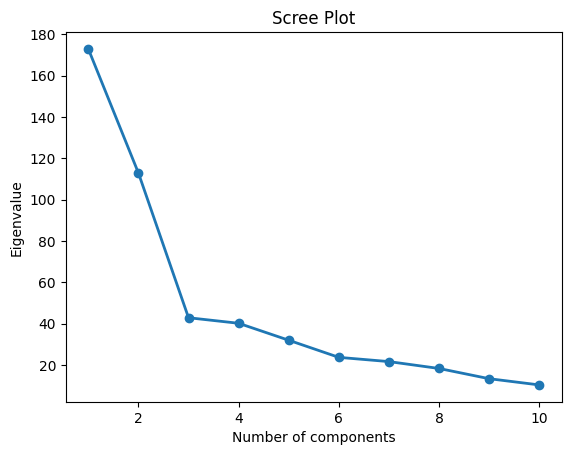

In [ ]:
#plot_scree(X_train_reduced, 20)

모델 선택 => k폴더 교차검증,그리디 서치=> 최적의 parameter찾기,  앙상블


In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_xgb, X = X_train_reduced, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

KeyboardInterrupt: ignored

In [ ]:
classifier_svr = SVC()
classifier_svr.fit(X_train_reduced, y_train)

SVC()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svr, X = X_train_reduced, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from catboost import CatBoostClassifier
classfier_cb = CatBoostClassifier()
classfier_cb.fit(X_train_reduced, y_train)

Learning rate set to 0.097501
0:	learn: 1.9642600	total: 275ms	remaining: 4m 34s
1:	learn: 1.7636673	total: 495ms	remaining: 4m 6s
2:	learn: 1.6102025	total: 708ms	remaining: 3m 55s
3:	learn: 1.4941305	total: 924ms	remaining: 3m 50s
4:	learn: 1.3976700	total: 1.13s	remaining: 3m 45s
5:	learn: 1.3221973	total: 1.35s	remaining: 3m 43s
6:	learn: 1.2544185	total: 1.58s	remaining: 3m 44s
7:	learn: 1.1943886	total: 1.79s	remaining: 3m 42s
8:	learn: 1.1421519	total: 2.01s	remaining: 3m 41s
9:	learn: 1.0937571	total: 2.22s	remaining: 3m 39s
10:	learn: 1.0513547	total: 2.43s	remaining: 3m 38s
11:	learn: 1.0141323	total: 2.65s	remaining: 3m 37s
12:	learn: 0.9843823	total: 2.85s	remaining: 3m 36s
13:	learn: 0.9514327	total: 3.06s	remaining: 3m 35s
14:	learn: 0.9225336	total: 3.27s	remaining: 3m 35s
15:	learn: 0.8995331	total: 3.5s	remaining: 3m 34s
16:	learn: 0.8760202	total: 3.7s	remaining: 3m 33s
17:	learn: 0.8521303	total: 3.92s	remaining: 3m 33s
18:	learn: 0.8330940	total: 4.13s	remaining: 3m

KeyboardInterrupt: ignored

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30],  # 트리의 최대 깊이
    'criterion': ['gini', 'entropy']  # 분할 품질을 측정하는 기준
}
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced,y_train) #여기서 y_train이 1차원 배열이여야함
rf = grid_search.best_params_
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# 모델 정의
model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(10, 200),  # 트리의 개수

}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# 랜덤 서치 수행 (주어진 n_iter 만큼 랜덤하게 조합을 시도)
random_search.fit(X_test_std, y_test)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

# 최적의 모델 출력
best_model = random_search.best_estimator_


최적의 하이퍼파라미터: {'n_estimators': 131}


In [ ]:

#넣을 후보들
param_grid={"criterion":["gini", "entropy", "log_loss"], "max_depth":[2, 4, 8]}
# 모델
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
# 데이터 평가
dt = grid_search.best_params_
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

NameError: ignored

In [ ]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, #C가 낮을수록 정규화가 강해진다
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}] #gamma는 커널의 공식 계수 -> gamma커널은 rbf에만 적용가능 linear에는 불가능
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1) # n_jobs : 머신에서 모든 프로세서가 사용된다

grid_search.fit(X_train_reduced, y_train)
svr = grid_search.best_params_
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

In [ ]:

param_grid = {
    'n_neighbors': [3, 5, 7],  # 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 옵션
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # 이웃 검색에 사용되는 알고리즘
    'p': [1, 2],  # 거리 측정에 사용되는 매개변수 (1: 맨해튼 거리, 2: 유클리드 거리)
    'metric': ['minkowski', 'manhattan', 'euclidean']  # 거리 측정 메트릭
}

# 모델
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
knn = grid_search.best_params_
# 데이터 평가
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

In [ ]:
neigh_model = KNeighborsClassifier(n_neighbors=knn['n_neighbors'])
rnf_model = RandomForestClassifier(criterion=rf['criterion'] ,random_state=42)
svm_model = SVC(kernel = svr['kernel'], random_state = 0)
classifier_xgb = XGBClassifier()
classfier_cb = CatBoostClassifier()
model = VotingClassifier(
    estimators=[('nm', neigh_model), ('rf', rnf_model), ('svc', svm_model)], voting='hard')
model.fit(X_train_reduced, y_train)

KeyboardInterrupt: ignored

In [ ]:
svm_model = SVC()
classifier_xgb = XGBClassifier()
classfier_cb = CatBoostClassifier()
lgb_model = lgb.LGBMClassifier()
hist_gb_model = HistGradientBoostingClassifier(max_iter=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = VotingClassifier(
    estimators=[ ('hist_gb', hist_gb_model), ('rf', rf_model),('lm', lgb_model), ('cx', classifier_xgb), ('svc', svm_model)], voting='hard')
model.fit(X_train_reduced, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20145
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 79
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


VotingClassifier(estimators=[('hist_gb',
                              HistGradientBoostingClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lm', LGBMClassifier()),
                             ('cx',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=F...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svc', SVC())],
                 voting='soft')

In [ ]:
X_test_reduced.shape

(10000, 20)

test데이터로 예측

In [ ]:
#np.array(X_test_reduced).ravel()

y_pred = (model.predict(X_test_reduced))
print(X_test_reduced)
print(y_pred)

AttributeError: ignored

혼동행렬 사용하여 정확도 예측

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[865   0  11  31   2   3  79   1   8   0]
 [  5 971   3  15   1   1   4   0   0   0]
 [ 11   2 808  11  93   1  69   0   5   0]
 [ 20   8  10 912  29   0  20   0   1   0]
 [  1   0  59  24 855   0  59   0   2   0]
 [  1   0   0   1   0 927   1  46   4  20]
 [150   0  88  25  68   0 657   0  12   0]
 [  0   0   0   0   0  25   0 920   1  54]
 [  3   0   4   3   1   3  10   1 974   1]
 [  0   0   0   0   0  18   0  37   0 945]]


0.8834

예측된 클래스 값을 testResult.txt 파일에 저장

In [ ]:

with open("testResult.txt", "w") as f:
    for index, prediction in enumerate(y_pred):
      index_str = f"{index:05d}" #5자리의 길이로 표시하고, 빈 자리는 0으로 채우는 문자열을 생성
      result = f"{index_str} {int(prediction)}"
      f.write(result + "\n")


In [ ]:
with open("testResult.txt", "r") as f:
    content = f.read()

print(content)